**Linear Regression**

 *1.Ordinary Least Squares*

In [12]:
from sklearn import linear_model

# Create a model
reg = linear_model.LinearRegression()

# Train the model with three data points
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])

# Print the coefficients
print("Coefficients:", reg.coef_)

# Print the intercept
print("Intercept:", reg.intercept_)

Coefficients: [0.5 0.5]
Intercept: 2.220446049250313e-16


In [36]:
import numpy as np
from sklearn import linear_model
x=np.random.rand(12,3)
y=np.random.rand(12,)
print(y)
#create a model
reg=linear_model.LinearRegression()
#Fit the model
reg.fit(x,y)
#prediction
pred=reg.predict(x)
print("Predictions:",pred)
print("Coefficients:",reg.coef_)
print("Intercept:",reg.intercept_)

[0.35547362 0.08122204 0.55106216 0.07005808 0.61257794 0.06852465
 0.86437392 0.95772588 0.38083906 0.60470393 0.40288798 0.81046242]
Predictions: [0.59273479 0.55307717 0.59343967 0.23041803 0.50543522 0.16193328
 0.42016837 0.57101877 0.55706897 0.47188625 0.32897055 0.77376062]
Coefficients: [ 0.43960824 -0.19589622 -0.10421364]
Intercept: 0.40768657280254395


In [14]:
from sklearn import linear_model
#create a model
reg=linear_model.LinearRegression()
#Train the model with three data points
reg.fit([[0,0],[1,1],[2,2]],[0,1,2])
# Print the coefficients
print(reg.coef_)
#coef_array([0,0.5,0.5])

[0.5 0.5]


*2.Non negative Least Squares*

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
np.random.seed(42)
n_samples,n_features=200,50
X=np.random.randn(n_samples,n_features)
true_coef=3*np.random.randn(n_features)
# Threshold coefficients to render them non-negative
true_coef[true_coef<0]=0
y=np.dot(X,true_coef)
#Add noise
y+=5*np.random.normal(size=(n_samples,))


In [14]:
#Split the data in train set and test set
from sklearn.model_selection import train_test_split
#Splits the data into 50% training and 50% testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
#Fit the Non-Negative least squares.
from sklearn.linear_model import LinearRegression
reg_nnls=LinearRegression(positive=True)
# Non-Negative Least Squares (NNLS) 
y_pred_nnls=reg_nnls.fit(X_train,y_train).predict(X_test)
r2_score_nnls=r2_score(y_test,y_pred_nnls)
print("NNLS R2 Score",r2_score_nnls)
#Fit an OLS
reg_ols= LinearRegression()
# Ordinary Least Squares (OLS)
y_pred_ols=reg_ols.fit(X_train,y_train).predict(X_test)
r2_score_ols=r2_score(y_test,y_pred_ols)
print("OLS R2 score",r2_score_ols)

NNLS R2 Score 0.8225220806196525
OLS R2 score 0.7436926291700343


Text(0.5, 1.0, 'Non Negative Least Squares')

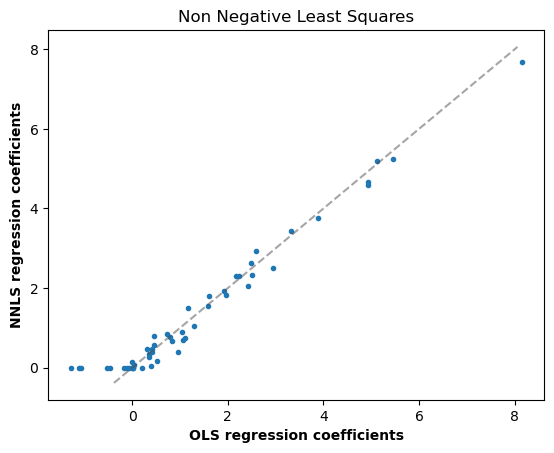

In [8]:
fig,ax=plt.subplots()
ax.plot(reg_ols.coef_,reg_nnls.coef_,linewidth=0,marker=".")
low_x,high_x=ax.get_xlim()
low_y,high_y=ax.get_ylim()
low=max(low_x,low_y)
high=min(high_x,high_y)
ax.plot([low,high],[low,high],ls="--",c="0.3",alpha=0.5)
ax.set_xlabel("OLS regression coefficients", fontweight="bold")
ax.set_ylabel("NNLS regression coefficients", fontweight="bold")
ax.set_title("Non Negative Least Squares")

*3.Ridge Linear Regression*


In [7]:
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

from sklearn.model_selection import train_test_split

#Generate Dummy regression data
x,y =make_regression(n_samples=100,n_features=2,noise=10)
#Split data 
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)
#Initialize ridge Regression model
model=Ridge(alpha=0.1) #Alpha is the regulation strength

#Train the model and predict
model.fit(x_train,y_train).predict(x_test)



array([-181.85748174,  -78.20833519,  -48.24454011,   38.20101314,
         86.79547405,  -56.98159654,    6.77958273,   15.81687582,
         22.4310064 ,    1.18357674,  -55.33684459,  -13.09375511,
         16.71925482,    0.70433555,  -14.61914641, -192.31481393,
         37.77105114,   38.82707945,  -28.94418888, -177.56127904])

In [36]:
from sklearn.datasets import load_iris

data = load_iris()
print(data.data.shape)  # Features
print(data.target.shape)  # Labels


(150, 4)
(150,)


*4.Lasso Linear Model*

In [23]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

#create/load a synthetic regression dataset
X,y=make_regression(n_samples=10,n_features=10,noise=0.1,random_state=42)

#Split the dataset into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#initialize and fit the Lasso Model 
lasso=Lasso(alpha=0.1)
lasso.fit(X_train,y_train)

#make predict and evaluate the model
y_pred=lasso.predict(X_test)

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error:{mse}")

Mean Squared Error:7358.16114336399


In [27]:
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

#create/Load synthetic regression Dataset
X,y=make_regression(n_samples=100,n_features=50,noise=0.3,random_state=42)

#Split the data set
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.3,random_state_42)

#initialize and fit the Lasso Model 
lasso=Lasso(alpha=0.2)
lasso.fit(X_train,y_train)



[[ 0.60451533 -0.95393942  0.7906256  ... -0.06613261  0.47240628
   1.80434811]
 [-0.54685894 -0.37482081 -1.12905177 ...  1.50399299  0.05921843
   1.84895609]
 [ 1.32527609  1.22999037 -2.19125385 ... -0.37563367  0.92824569
  -0.39187677]
 ...
 [ 0.27926784  0.07980148 -0.69819967 ...  0.29724427  0.20636177
  -0.73805708]
 [ 0.44947391 -0.14896931 -1.54572979 ... -0.98230358  1.06137096
   0.33855288]
 [ 0.21915033  0.70835645  1.88115707 ...  0.18660912  0.04643655
   0.36867331]] [ 142.1651374    81.59697157 -130.68307194  269.97850658 -107.64016516
 -140.36051407  162.85919635 -252.57821223    6.87289585   77.9636238
  143.40624284  100.48553975 -125.20905283   98.91782953  -16.22307937
 -185.27494575 -151.51376404   14.32296996   38.19981237  -89.90369417
   85.66720403    1.53420752  -19.12841575  -55.5206748   173.01298979
  -79.97788322   59.64214301  127.71659776  -63.86468275  -13.92859275
  124.14239602 -124.66896755 -157.11614982 -220.99177212  -12.9300349
   46.6695782

*5.Multi Task Lasso*

In [18]:
from sklearn.linear_model import MultiTaskLasso
import numpy as np
x=np.array([[2,3],[4,5],[6,6],[7,8],[9,8]])
y=np.array([[2,1],[4,7],[1,6],[3,5],[1,5]])

MTL= MultiTaskLasso(alpha=1.0)
MTL.fit(x,y)
prediction=MTL.predict(x)
print(prediction)

[[2.62241496 3.92499758]
 [2.38773998 4.41111004]
 [2.153065   4.89722249]
 [2.03572752 5.14027872]
 [1.80105254 5.62639117]]


In [20]:
import numpy as np
from sklearn.linear_model import MultiTaskLasso

# Sample input data (X) and multi-output target (Y)
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
Y = np.array([[2, 1], [3, 2], [4, 3], [5, 4]])  # 2 target variables

# Initialize and fit model
model = MultiTaskLasso(alpha=1.0)
model.fit(X, Y)

# Predict
predictions = model.predict(X)

print("Coefficients:\n", model.coef_)
print("Intercepts:\n", model.intercept_)
print("Predictions:\n", predictions)


Coefficients:
 [[0.43431458 0.        ]
 [0.43431458 0.        ]]
Intercepts:
 [2.41421356 1.41421356]
Predictions:
 [[2.84852814 1.84852814]
 [3.28284271 2.28284271]
 [3.71715729 2.71715729]
 [4.15147186 3.15147186]]


*6.Elastic Net*

In [17]:

from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

#load the synthetic dataset
x,y=make_regression(n_samples=10,n_features=5,noise=0.3,random_state=42)

#Split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

#create Model
model=ElasticNet(alpha=0.5,l1_ratio=0.4)

#train and fit
model.fit(x_train,y_train)

#prediction
pred=model.predict(x_test)
print(pred)

[-142.78683994   57.58765995 -139.11079528]


*7.Multi-task Elastic-Net*

In [17]:
import numpy as np

# Sample data (make sure y is 2D)
x_train = np.random.rand(5, 2)#5 samples, each with 2 features.
y_train = np.random.rand(5, 3)#5 samples, each with 3 target values 
print(x_train,x_test)

[[0.10587662 0.57945592]
 [0.13188985 0.67819965]
 [0.02308256 0.59119517]
 [0.30945184 0.09353646]
 [0.72184554 0.96579909]] [[ 0.55623001  1.60734558  0.81573721 ...  0.26859228 -0.75679509
  -1.04691098]
 [-0.43973106 -0.99835404 -0.91865195 ...  0.8896308  -0.30917212
   0.93828381]
 [ 0.5792915   1.5615112  -0.48791141 ... -0.93326796 -2.59104229
  -1.17011303]
 ...
 [ 0.8177663  -0.30246969  1.21876185 ... -0.3052247  -0.89846798
  -0.66809045]
 [-0.05952536  0.58831721  0.66213067 ... -1.43014138 -0.48423407
  -1.26088395]
 [-0.40307599 -1.27630442  1.34622576 ...  0.20780251 -2.53224609
   0.49142945]]


In [29]:
import numpy as np
from sklearn.linear_model import MultiTaskElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic dataset
# 100 samples, 5 input features
X = np.random.rand(100, 5)

# 100 samples, 3 output targets (multi-output regression)
Y = np.random.rand(100, 3)

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the MultiTaskElasticNet model
model = MultiTaskElasticNet(alpha=0.5, l1_ratio=0.3)

# Fit the model to the training data
model.fit(x_train, y_train)

# Predict on the test set
pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, pred)
print("Mean Squared Error:", mse)

# Optional: Check shapes
print("Predictions shape:", pred.shape)  # Should be (20, 3)
print("Predictions:", pred)

Mean Squared Error: 0.0991380221924817
Predictions shape: (20, 3)
Predictions: [[0.49704515 0.52664094 0.47633665]
 [0.49704515 0.52664094 0.47633665]
 [0.49704515 0.52664094 0.47633665]
 [0.49704515 0.52664094 0.47633665]
 [0.49704515 0.52664094 0.47633665]
 [0.49704515 0.52664094 0.47633665]
 [0.49704515 0.52664094 0.47633665]
 [0.49704515 0.52664094 0.47633665]
 [0.49704515 0.52664094 0.47633665]
 [0.49704515 0.52664094 0.47633665]
 [0.49704515 0.52664094 0.47633665]
 [0.49704515 0.52664094 0.47633665]
 [0.49704515 0.52664094 0.47633665]
 [0.49704515 0.52664094 0.47633665]
 [0.49704515 0.52664094 0.47633665]
 [0.49704515 0.52664094 0.47633665]
 [0.49704515 0.52664094 0.47633665]
 [0.49704515 0.52664094 0.47633665]
 [0.49704515 0.52664094 0.47633665]
 [0.49704515 0.52664094 0.47633665]]


*8.LARS Lasso*

Coefficient of LARS Lasso: [26.08115152 77.03550123  0.          0.         50.48871618  6.68087305
 48.52589538 31.9053368   0.         70.2703282   4.56179978 77.90569788
  0.          0.         80.89863346]


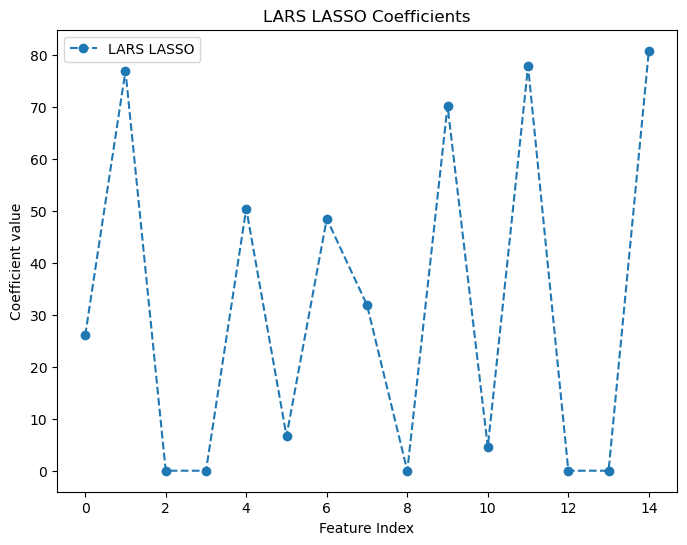

In [32]:
#solve the Lasso(L1) problem with LARS algorithm
from sklearn.linear_model import LassoLars
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

#load synthetic data set
x,y=make_regression(n_features=15,n_samples=100,noise=0.2,random_state=42)

larslasso=LassoLars(alpha=1)
larslasso.fit(x,y)

coefficients=larslasso.coef_
print("Coefficient of LARS Lasso:",coefficients)

#plot
plt.figure(figsize=(8,6))
plt.plot(coefficients,marker='o',label="LARS LASSO",linestyle='--')
plt.title("LARS LASSO Coefficients")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient value")
plt.legend()
plt.show()

*9.Orthogonal Matching Pursuit*

[26.96716702 78.48155753  0.          0.         51.74966754  7.72249915
 49.81376225 33.41209534  0.         70.77269285  5.84579162 78.86430443
  0.          0.         82.51264294]


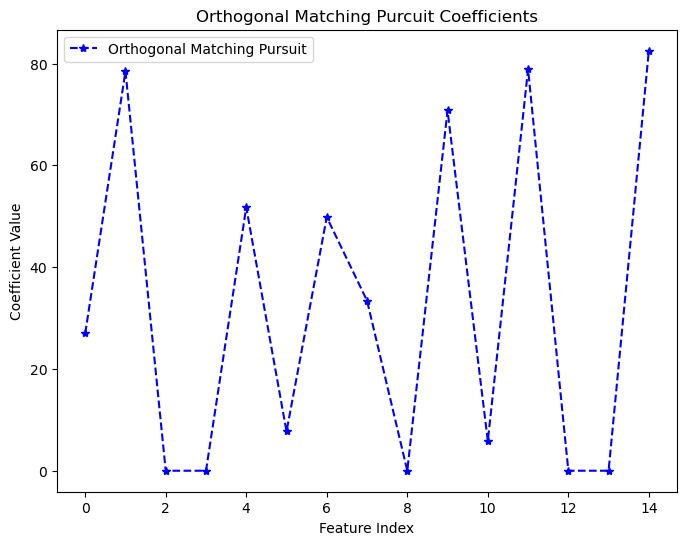

[ 0  1  4  5  6  7  9 10 11 14]


In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import OrthogonalMatchingPursuit

x,y=make_regression(n_features=15,n_samples=100,noise=0.1,random_state=42)

omp=OrthogonalMatchingPursuit(n_nonzero_coefs=10)
omp.fit(x,y)

coefficients=omp.coef_
print(coefficients)

#plot
plt.figure(figsize=(8,6))
plt.plot(coefficients,linestyle='--',color='b',label='Orthogonal Matching Pursuit',marker='*')
plt.xlabel('Feature Index')
plt.ylabel("Coefficient Value")
plt.title('Orthogonal Matching Purcuit Coefficients')
plt.legend()
plt.show()

#selected Feature
Selected_feature=np.where(coefficients !=0)[0]
print(Selected_feature) #[ 0  1  4  5  6  7  9 10 11 14]
#print(f"Selected Feature:{Selected_feature}") #return Selected Feature:[ 0  1  4  5  6  7  9 10 11 14]

*10.Bayesian Linear Regression*

In [20]:
import numpy as np
import matplotlib.pyplot as plt
#import pymc3 as pm

#genarate some data
np.random.seed(123) #seed does not generate any random numbers itself
x=np.random.randn(100)
print(x)

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025  1.65143654
 -2.42667924 -0.42891263  1.26593626 -0.8667404  -0.67888615 -0.09470897
  1.49138963 -0.638902   -0.44398196 -0.43435128  2.20593008  2.18678609
  1.0040539   0.3861864   0.73736858  1.49073203 -0.93583387  1.17582904
 -1.25388067 -0.6377515   0.9071052  -1.4286807  -0.14006872 -0.8617549
 -0.25561937 -2.79858911 -1.7715331  -0.69987723  0.92746243 -0.17363568
  0.00284592  0.68822271 -0.87953634  0.28362732 -0.80536652 -1.72766949
 -0.39089979  0.57380586  0.33858905 -0.01183049  2.39236527  0.41291216
  0.97873601  2.23814334 -1.29408532 -1.03878821  1.74371223 -0.79806274
  0.02968323  1.06931597  0.89070639  1.75488618  1.49564414  1.06939267
 -0.77270871  0.79486267  0.31427199 -1.32626546  1.41729905  0.80723653
  0.04549008 -0.23309206 -1.19830114  0.19952407  0.46843912 -0.83115498
  1.16220405 -1.09720305 -2.12310035  1.03972709 -0.40336604 -0.12602959
 -0.83751672 -1.60596276  1.25523737 -0.68886898  1.

*11.Bayesian Ridge Regression*

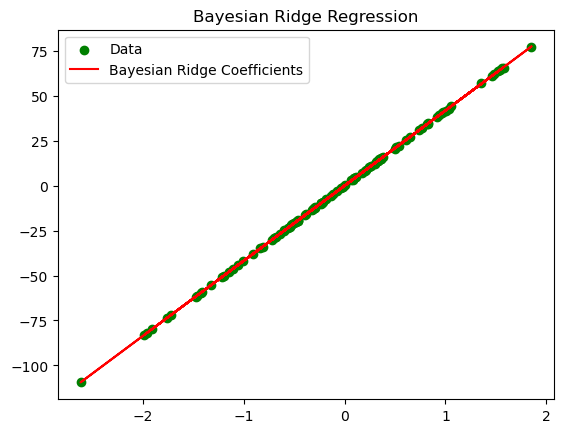

Coefficient: [41.79501247]
Estimate Intercept: 0.02330134674062556


In [27]:
from sklearn.linear_model import BayesianRidge
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

x,y,coef=make_regression(n_samples=100,n_features=1,random_state=42,noise=0.2,coef=True)

model=BayesianRidge()
model.fit(x,y)

pred=model.predict(x)

plt.scatter(x,y,color='g',label='Data')
plt.title('Bayesian Ridge Regression')
plt.plot(x,pred,color='r',label='Bayesian Ridge Coefficients')
plt.legend()
plt.show()

print("Coefficient:",model.coef_)
print("Estimate Intercept:",model.intercept_)


*12.Logistic Regression*

Predictions: [0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1]
Accuracy: 1.0
Confusion Matrix:
 [[20  0]
 [ 0 10]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



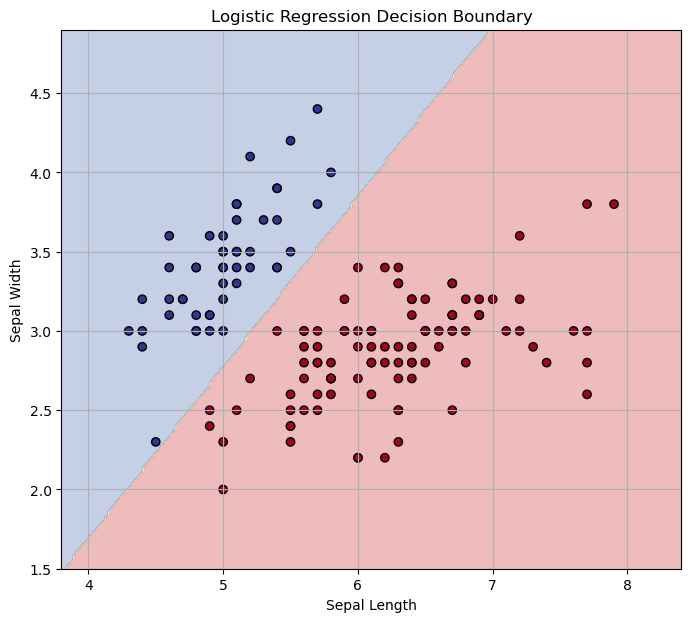

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Data Load
data = load_iris()
X = data.data[:, :2]  # Use only first 2 features for 2D plotting
y = (data.target == 0).astype(int)  # Binary classification: Setosa = 1, else = 0

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
pred = model.predict(X_test)
print("Predictions:", pred)

# Evaluation
print("Accuracy:", accuracy_score(y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("Classification Report:\n", classification_report(y_test, pred))

# Plot Decision Boundary
def plot_decision_boundary(model, X, y):
    h = 0.02  # Step size
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 7))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.title("Logistic Regression Decision Boundary")
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.grid()
    plt.show()

# Call the function
plot_decision_boundary(model, X, y)


*Logistic Regression Model Problem*

In [36]:
import numpy as np
from sklearn.linear_model import LogisticRegression

#data
x=np.array([[29],[15],[33],[28],[39]])
y=np.array([0,0,1,1,1])

#Train Logistic Regression Model
model=LogisticRegression()
model.fit(x,y)

# Get coefficients
beta_0 = model.intercept_[0]
beta_1 = model.coef_[0][0]
#Predict Probability for 33 Hours
pred=model.predict_proba([[33]])[0][1] #Select First row #select probability of class 1, which is Pass.
print(x)
print(pred)


# Calculate minimum hours needed for probability > 0.95
import math

# Solve 1 / (1 + exp(-(b0 + b1 * x))) = 0.95
# => b0 + b1 * x = log(0.95 / (1 - 0.95)) = log(19)
target_logit = math.log(0.95 / (1 - 0.95))
min_hours_95 = (target_logit - beta_0) / beta_1

(pred, min_hours_95)


[[29]
 [15]
 [33]
 [28]
 [39]]
0.8695451255816024


(0.8695451255816024, 35.912666297154054)